# Daegu Digs: What’s the Real Price of Home?
Main Goal: Predicting Daegu apartment prices using machine learning to help individuals or real estate agents price their properties just right.

## Business Problem Understanding

### Business Context
In a growing city like Daegu, apartments are a popular housing choice due to limited space and the busy urban lifestyle. However, pricing them accurately remains a challenge. Sellers, whether individuals or real estate agents, often struggle to strike the right balance—price too high, and the apartment may sit on the market; too low, and the seller misses out on potential profit.

That’s where machine learning comes in. By analysing factors such as location, apartment size, nearby facilities, and proximity to public transportation, we can uncover patterns that help sellers price their properties more accurately, reducing time on market and maximising profits.

### Problem Statement
Currently, apartment prices are often set based on intuition or basic market comparisons. This can lead to listings that either take too long to sell or get sold below market value. The need for a data-driven pricing model is clear.

This project aims to build a machine learning model that predicts apartment sale prices in Daegu, helping sellers better understand the market value of their properties and price them more competitively.

### Goals
- Build a machine learning model to predict apartment sale prices in Daegu.
- Identify key features—such as apartment size, proximity to subway stations, and nearby amenities—that significantly affect price.
- Provide actionable insights to help sellers make more informed pricing decisions.
- Lay the foundation for a real estate pricing tool that recommends price ranges based on apartment characteristics.

### Analytic Approach

1. **Data Understanding**
   - Understand the data by exploring trends and distributions.
   - Clean the data by handling missing values and outliers.
   - Visualise patterns and identify any outliers or data issues.

2. **Data Preprocessing:**
   - Encode categorical features and scale numerical features as needed.
   - Ensure the data is properly formatted for model training.

3. **Feature Engineering:**
   - Remove highly correlated features to avoid multicollinearity issues.

4. **Modeling:**
   - Test different regression models (e.g., Random Forest, Gradient Boosting, and XGBoost).
   - Use cross-validation to evaluate model performance on unseen data.

5. **Evaluation:**
   - Measure model performance with regression metrics like RMSE, MAE, MAPE, and R².
   - Compare different models to select the best-performing one.

6. **Insights & Next Steps:**
   - Analyse feature importance to understand which factors drive apartment prices.
   - Present findings and suggest how this model could evolve into a pricing tool for real estate platforms or sellers.

### Evaluation Metrics

Since we are predicting continuous values (apartment prices), we will use the following **regression metrics**:

- **Mean Absolute Error (MAE):**  
  Measures the average magnitude of the errors in predictions. It’s straightforward to understand, representing the average amount our model’s predictions are off by.

- **Root Mean Squared Error (RMSE):**  
  Similar to MAE, but gives higher weight to larger errors, making it more sensitive to significant mispricing.

- **R² Score (Coefficient of Determination):**  
  Shows how much of the variation in apartment prices our model can explain. A higher R² indicates a better fit of the model to the data.

- **Mean Absolute Percentage Error (MAPE):**
  Expresses prediction accuracy as a percentage. It shows the average error as a proportion of actual values, making it easier to interpret relative errors across different price ranges.

### Business Perspective on Errors

From a business standpoint, the errors in our price predictions can have the following consequences:

- **Overpricing (predicting too high):**
  - Consequence: The apartment remains unsold for too long, leading to lost time and potential buyers turning to other listings. Opportunity costs can arise as the property sits idle on the market.

- **Underpricing (predicting too low):**
  - Consequence: The apartment sells quickly but for less than its true market value, meaning the seller loses out on potential profit.

### Objective

Our goal is to minimise both overpricing and underpricing errors while ensuring the model avoids large pricing mistakes that could result in lost revenue or unsold properties. To achieve this, we will focus on **RMSE** (to minimise large errors) and **MAE** (for general accuracy).

## Data Understanding

Dataset source : https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx

**Note:**
- Most features are numeric (Float and Integer), with some high cardinality.
- Each row represents an apartment listing with features related to its sale.

### Attribute Information

| Attribute                           | Data Type         | Description |
| ------------------------------------ | ----------------- | ----------- |
| Hallway Type                         | Categorical       | Type of apartment (e.g., hallway, penthouse, etc.) |
| TimeToSubway                         | Categorical       | Time in minutes needed to reach the nearest subway station |
| SubwayStation                        | Categorical       | Name of the nearest subway station |
| N_FacilitiesNearBy(ETC)              | Numeric (Float) | Number of miscellaneous facilities near the apartment |
| N_FacilitiesNearBy(PublicOffice)     | Numeric (Float) | Number of public office facilities near the apartment |
| N_SchoolNearBy(University)          | Numeric (Float) | Number of universities near the apartment |
| N_Parkinglot(Basement)              | Numeric (Float) | Number of basement parking lots available for the apartment |
| YearBuilt                            | Numeric (Integer) | Year the apartment building was constructed |
| N_FacilitiesInApt                   | Numeric (Integer) | Number of facilities within the apartment itself |
| Size(sqft)                           | Numeric (Integer)   | Size of the apartment in square feet |
| SalePrice                           | Numeric (Integer)   | Sale price of the apartment in Korean Won (target variable) |

In [63]:
# Data manipulation and analysis:
import pandas as pd
import numpy as np
import joblib
import shap
import pickle

# Visualisation:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px
from IPython.display import display

# Feature engineering and preprocessing:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import TargetEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import RFECV

# Model selection:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.inspection import permutation_importance

# Model evaluation:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer

# Data splitting and cross validation:
from sklearn.model_selection import train_test_split, cross_val_score

# Ignore warnings:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns for Pandas:
pd.set_option('display.max_columns', None)

In [64]:
# Load Dataset:
df = pd.read_csv("data_daegu_apartment.csv")
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [65]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


A few things stood out about the numeric columns:

- YearBuilt ranges from 1978 to 2015, with a median year of 2006—so most properties were built in the 2000s, which makes sense for a relatively modern housing dataset.
- Size(sqf) varies a lot—from 135 sqft up to 2337 sqft—with a median around 910 sqft, which likely reflects a mix of studio apartments and larger units.
- SalePrice spans from about ₩32,743 to ₩585,840, with a median price of ₩209,734. There’s a wide range here, which could be useful for modeling but also suggests we might want to handle outliers carefully.
- Features like N_FacilitiesNearBy(PublicOffice) and N_FacilitiesInApt show moderate variation, while N_Parkinglot(Basement) has a huge spread—probably because it's measured in square footage rather than count.

In [66]:
# General information on dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


## Data Cleaning

In [67]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[corridor, terraced]"
1,TimeToSubway,object,0,0.0,5,"[15min~20min, 10min~15min]"
2,SubwayStation,object,0,0.0,8,"[no_subway_nearby, Kyungbuk_uni_hospital]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[1.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[6.0, 4.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[3.0, 1.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[184.0, 1174.0]"
7,YearBuilt,int64,0,0.0,16,"[2005, 1978]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[5, 3]"
9,Size(sqf),int64,0,0.0,89,"[676, 192]"


In [68]:
# Check for duplicates:
df.duplicated().sum()

1422

We found that 1,422 out of 4,123 rows (~34%) in the dataset were exact duplicates. Since repeated records can bias the model and lead it to overemphasise certain patterns, it made sense to drop them. This helps ensure the model learns from a cleaner, more balanced, and representative dataset.

In [69]:
# Drop duplicates:
df = df.drop_duplicates()

In [70]:
# Check inconsistent entries:
df['HallwayType'].value_counts()

HallwayType
terraced    1667
mixed        698
corridor     336
Name: count, dtype: int64

In [71]:
# Standardise HallwayType format:
df['HallwayType'] = df['HallwayType'].str.capitalize()
df['HallwayType'].value_counts()

HallwayType
Terraced    1667
Mixed        698
Corridor     336
Name: count, dtype: int64

In [72]:
# Check inconsistent entries:
df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1248
5min~10min             501
10min~15min            434
15min~20min            418
no_bus_stop_nearby     100
Name: count, dtype: int64

In [73]:
# Standardise TimeToSubway format:
df['TimeToSubway'] = df['TimeToSubway'].str.replace('~', '-')
df['TimeToSubway'] = df['TimeToSubway'].replace({'no_bus_stop_nearby': 'No Bus Stop Nearby'})
df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1248
5min-10min             501
10min-15min            434
15min-20min            418
No Bus Stop Nearby     100
Name: count, dtype: int64

In [74]:
# Check inconsistent entries:
df['SubwayStation'].value_counts()

SubwayStation
Myung-duk                709
Kyungbuk_uni_hospital    692
Sin-nam                  380
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

In [75]:
# Standardise SubwayStation format:
subway_rename_map = {
    'Myung-duk': 'Myung-duk',
    'Kyungbuk_uni_hospital': 'Kyungbuk Uni Hospital',
    'Sin-nam': 'Sin-nam',
    'Banwoldang': 'Banwoldang',
    'Bangoge': 'Bangoge',
    'no_subway_nearby': 'No Subway Nearby',
    'Chil-sung-market': 'Chil-sung Market',
    'Daegu': 'Daegu'
}

df['SubwayStation'] = df['SubwayStation'].replace(subway_rename_map)
df['SubwayStation'].value_counts()

SubwayStation
Myung-duk                709
Kyungbuk Uni Hospital    692
Sin-nam                  380
Banwoldang               333
Bangoge                  280
No Subway Nearby         188
Chil-sung Market          65
Daegu                     54
Name: count, dtype: int64

In [76]:
# View dataset:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,Terraced,0-5min,Kyungbuk Uni Hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,Terraced,10min-15min,Kyungbuk Uni Hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,Mixed,15min-20min,Chil-sung Market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,Mixed,5min-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,Terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [77]:
# Double check distributions:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


## Exploratory Data Analysis

In [78]:
# Visualise the distribution of SalePrice (target variable):
fig = px.histogram(df, x='SalePrice', nbins=50, title="Distribution of Sale Price")
fig.update_layout(
    xaxis_title="Sale Price (₩)", 
    yaxis_title="Count"
)

fig.update_traces(marker_color='#FF8DA1')
fig.show()

**Analysis:** As expected, the prices are right-skewed—most properties are clustered between ₩100k and ₩300k, with fewer high-priced listings above ₩400k. There's a noticeable peak around ₩200k, which might represent the typical mid-range apartment. The tail stretches out quite a bit toward ₩600k, so we'll keep an eye on those outliers when we start modeling.

In [79]:
# Box plot for SalePrice's outliers:
fig = px.box(df, y='SalePrice', title="Box Plot of Sale Price")
fig.update_layout(
    yaxis_title="Sale Price (₩)"
)

fig.update_traces(marker_color='#FF8DA1')
fig.show()


**Analysis:** Most of the prices fall between roughly ₩150k and ₩300k, with the median sitting around ₩225k. There are a few higher-priced properties above ₩500k marked as outliers, which is expected in real estate data. These outliers might reflect luxury units or unique listings, but we’ll keep them for now since they could carry useful information for modeling.

In [80]:
# Skewness of SalePrice:
df['SalePrice'].skew() # Only mildly skewed.

0.38608459274791307

In [81]:
# Visualise the distribution of Size(sqf):
fig = px.histogram(df, x='Size(sqf)', nbins=50, title="Distribution of Size")
fig.update_layout(
    xaxis_title="Size (sqft)", 
    yaxis_title="Count"
)

fig.update_traces(marker_color='#FF8DA1')
fig.show()

In [82]:
# Box plot for Size(sqf)'s outliers:
fig = px.box(df, y='Size(sqf)', title="Box Plot of Size")
fig.update_layout(
    yaxis_title="Size (sqft)"
)

fig.update_traces(marker_color='#FF8DA1')
fig.show()

In [83]:
# Skewness of Size(sqf):
df['Size(sqf)'].skew() # Moderately skewed.

0.851400332439604

In [84]:
# Bar chart for SalePrice vs HallwayType:
# Group by HallwayType to get average SalePrice:
avg_price_by_hallway = df.groupby('HallwayType', as_index=False)['SalePrice'].mean()

fig = px.bar(
    avg_price_by_hallway,
    x='HallwayType',
    y='SalePrice',
    title="Average Sale Price by Hallway Type",
    labels={'HallwayType': 'Hallway Type', 'SalePrice': 'Average Sale Price (₩)'},
    color='HallwayType',
    color_discrete_map={
        'Terraced': '#FF8DA1',
        'Mixed': '#F77896',
        'Corridor': '#FFB6C1'
    }
)

fig.show()

**Analysis:** This bar chart shows the average sale price based on different hallway types. Interestingly, properties with a Terraced hallway type tend to have the highest average prices, followed by Mixed, and then Corridor types. This suggests that hallway design might be associated with overall building quality or unit appeal, with terraced layouts possibly being more desirable or premium. It’s a good reminder to consider even architectural details when analysing property value.

In [85]:
# Box plot for SalePrice vs TimeToSubway's outliers:
fig = px.box(df, x='TimeToSubway', y='SalePrice', title="Sale Price vs Time To Subway with Outliers",
             labels={'TimeToSubway': 'Time to Subway', 'SalePrice': 'Sale Price (₩)'})

fig.update_traces(marker_color='#FF8DA1')
fig.show()

**Analysis:** This box plot shows how property prices vary based on the time it takes to walk to the nearest subway. As expected, places within a 0–5 minute walk tend to have the highest median sale prices and also the most expensive outliers—proximity clearly adds value. On the other hand, properties farther away, especially in the 15–20 minute range, generally go for less. Even those with no nearby bus stop tend to be priced lower. It reinforces a common real estate insight: better transit access often means higher property value.

In [86]:
# Bar chart for SalePrice vs SubwayStation:
# Group by SubwayStation to get average SalePrice:
avg_price_by_station = df.groupby('SubwayStation', as_index=False)['SalePrice'].mean()

fig = px.bar(
    avg_price_by_station,
    x='SubwayStation',
    y='SalePrice',
    title="Average Sale Price by Subway Station",
    labels={'SubwayStation': 'Subway Station', 'SalePrice': 'Average Sale Price (₩)'},
    color='SubwayStation',
    color_discrete_map={
        'Myung-duk': '#FF8DA1',
        'Kyungbuk Uni Hospital': '#F77896',
        'Sin-nam': '#FFB6C1',
        'Banwoldang': '#FF6F91',
        'Bangoge': '#FF9AA2',
        'No Subway Nearby': '#FFA8B6',
        'Chil-sung Market': '#FFC1CC',
        'Daegu': '#FFD6DD'
    }
)
fig.show()

**Analysis:** This chart compares the average property prices based on the nearest subway station. It’s clear that Banwoldang and Kyungbuk Uni Hospital areas have the highest average sale prices—likely because they’re central or have better access to key facilities. Chil-sung Market and Daegu show noticeably lower prices, suggesting they might be less in demand or further from city hotspots. Interestingly, even places with no nearby subway have relatively high prices, which could mean those neighbourhoods offer other perks like parking or quieter surroundings. Overall, location near certain stations does seem to influence how much buyers are willing to pay.

In [87]:
# Box plot for SalePrice vs N_FacilitiesNearBy(ETC)'s outliers:
fig = px.box(df, x='N_FacilitiesNearBy(ETC)', y='SalePrice', title="Sale Price vs Number of Nearby Facilities with Outliers",
             labels={'N_FacilitiesNearBy(ETC)': 'Number of Nearby Facilities', 'SalePrice': 'Sale Price (₩)'})

fig.update_traces(marker_color='#FF8DA1')
fig.show()

**Analysis:** This chart shows how sale prices vary depending on the number of nearby facilities (like marts, banks, etc.). What’s surprising is that properties with zero nearby facilities actually have the highest median price and wider price range—maybe those areas are premium residential zones where people prefer less crowd and noise. As the number of facilities increases, the median price tends to drop slightly, and the overall price spread becomes narrower. It seems more facilities nearby doesn’t necessarily mean higher property value—buyers might be paying more for peace and space than convenience in this case.

In [88]:
# Box plot for SalePrice vs N_FacilitiesNearBy(PublicOffice)'s outliers:
fig = px.box(df, x='N_FacilitiesNearBy(PublicOffice)', y='SalePrice', title="Sale Price vs Number of Nearby Public Office with Outliers",
             labels={'N_FacilitiesNearBy(PublicOffice)': 'Number of Nearby Public Office', 'SalePrice': 'Sale Price (₩)'})

fig.update_traces(marker_color='#FF8DA1')
fig.show()

**Analysis:** This chart explores how property prices relate to the number of nearby public offices. At first glance, there’s no clear upward or downward trend—places with 0 or 4 public offices nearby actually have some of the highest median sale prices, while others with more offices show much lower prices. The spread also gets pretty wide at 3, 4, and 7 offices, suggesting price inconsistency in those areas. So, just having more public offices nearby doesn’t guarantee higher property value—buyers might care more about other factors like neighbourhood type or property size.

In [89]:
# Box plot for SalePrice vs N_SchoolNearBy(University)'s outliers:
fig = px.box(df, x='N_SchoolNearBy(University)', y='SalePrice', title="Sale Price vs Number of Nearby Universities with Outliers",
             labels={'N_SchoolNearBy(University)': 'Number of Nearby Universities', 'SalePrice': 'Sale Price (₩)'})

fig.update_traces(marker_color='#FF8DA1')
fig.show()

**Analysis:** This box plot looks at how property prices vary depending on how many universities are nearby. Interestingly, having one or two nearby universities seems to be linked with higher and more consistent sale prices—their boxes sit higher on the scale. Meanwhile, homes near four or more universities tend to have lower median prices and a tighter range, which might suggest smaller or more standardised housing in those areas. Also, notice how properties with zero universities nearby actually have the widest price spread, including some really high-priced outliers—maybe those are larger, suburban homes that don’t rely on university proximity.

In [90]:
# Scatter plot for SalePrice vs N_Parkinglot(Basement):
# Calculate IQR for SalePrice:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers directly for visualisation:
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]

# Create scatter plot for all data points:
fig = px.scatter(
    df, x='N_Parkinglot(Basement)', y='SalePrice',
    title="Sale Price vs Number of Parking Spaces with Outliers",
    hover_data=['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt'],
    trendline='ols',
    trendline_color_override='red'
)

# Set the colour:
fig.update_traces(marker=dict(color='#FF8DA1', size=8))

# Highlight outliers:
fig.add_scatter(
    x=outliers['N_Parkinglot(Basement)'],
    y=outliers['SalePrice'],
    mode='markers',
    marker=dict(color='#FF6F91', size=10, symbol='x'),
    name='Outliers',
    hovertext=outliers[['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt']].apply(
        lambda row: f"HallwayType: {row['HallwayType']}<br>TimeToSubway: {row['TimeToSubway']}<br>SubwayStation: {row['SubwayStation']}<br>YearBuilt: {row['YearBuilt']}", axis=1
    )
)

# Add annotations for outliers:
for i in range(len(outliers)):
    fig.add_annotation(
        x=outliers.iloc[i]['N_Parkinglot(Basement)'],
        y=outliers.iloc[i]['SalePrice'],
        text="x",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40,
        font=dict(color="red"),
        arrowcolor="red"
    )

fig.update_layout(
    xaxis_title="Number of Parking Spaces",
    yaxis_title="Sale Price (₩)",
    legend_title="Data Type"
)

fig.show()

**Analysis:** This scatter plot shows the relationship between Sale Price and the number of basement parking spaces in apartment buildings. Most data points are fairly clustered, but we’ve highlighted the outliers (in red “x” markers) using the IQR method. These are the properties with unusually high sale prices compared to the rest. From the trendline, there’s a slight positive correlation—meaning, generally, more parking spaces are associated with higher prices, but the effect isn’t super strong. Still, it's a good hint that parking capacity might play a role in pricing.

In [91]:
# Scatter plot for SalePrice vs YearBuilt:
# Calculate IQR for SalePrice:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers directly for visualisation:
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]

# Create scatter plot for all data points:
fig = px.scatter(
    df, x='YearBuilt', y='SalePrice',
    title="Sale Price vs Year Built with Outliers",
    hover_data=['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt'],
    trendline='ols',
    trendline_color_override='red'
)

# Set the colour:
fig.update_traces(marker=dict(color='#FF8DA1', size=8))

# Highlight outliers:
fig.add_scatter(
    x=outliers['YearBuilt'],
    y=outliers['SalePrice'],
    mode='markers',
    marker=dict(color='#FF6F91', size=10, symbol='x'),
    name='Outliers',
    hovertext=outliers[['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt']].apply(
        lambda row: f"HallwayType: {row['HallwayType']}<br>TimeToSubway: {row['TimeToSubway']}<br>SubwayStation: {row['SubwayStation']}<br>YearBuilt: {row['YearBuilt']}", axis=1
    )
)

# Add annotations for outliers:
for i in range(len(outliers)):
    fig.add_annotation(
        x=outliers.iloc[i]['YearBuilt'],
        y=outliers.iloc[i]['SalePrice'],
        text="x",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40,
        font=dict(color="red"),
        arrowcolor="red"
    )

fig.update_layout(
    xaxis_title="Year Built",
    yaxis_title="Sale Price (₩)",
    legend_title="Data Type"
)

fig.show()

**Analysis:** This scatter plot shows the relationship between Sale Price and Year Built. Each point represents a property, and outliers—those with unusually high sale prices—are marked with red "x" symbols. We can see a general upward trend, meaning properties built more recently tend to have higher sale prices. However, there are several high-price outliers, especially around 2007, where sale prices spike above ₩600k. This could be due to premium developments or special cases that don't follow the overall pattern. Also, while some older homes (pre-1990) sold at moderate prices, they don’t reach the peaks seen in newer properties. In short, newer buildings are generally more valuable, but outliers (especially in the 2007 cluster) show some properties sold far above typical market ranges.

In [92]:
# Box plot for SalePrice vs N_FacilitiesInApt's outliers:
fig = px.box(df, x='N_FacilitiesInApt', y='SalePrice', title="Sale Price vs Number of Facilities in Apartment with Outliers",
             labels={'N_FacilitiesInApt': 'Number of Facilities in Apartment', 'SalePrice': 'Sale Price (₩)'})

fig.update_traces(marker_color='#FF8DA1')
fig.show()

**Analysis:** This box plot shows how apartment sale prices change with the number of facilities available. Overall, there’s a clear trend—more facilities generally mean higher sale prices. Apartments with just 1–2 facilities tend to sell for under ₩150k, while those with 8–10 facilities often reach ₩300k or more, with some even crossing ₩500k. We can also see the spread widens as facilities increase, meaning price variability is higher in well-equipped apartments. A few outliers are scattered across all categories, but they’re especially noticeable in units with more amenities, which makes sense—premium properties often come with a price spike.

In [93]:
# Scatter plot to detect outliers in SalePrice vs Size(sqf):
# Calculate IQR for SalePrice:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers directly for visualisation:
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]

# Create scatter plot for all data points:
fig = px.scatter(
    df, x='Size(sqf)', y='SalePrice',
    title="Sale Price vs Size with Outliers",
    hover_data=['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt'],
    trendline='ols',
    trendline_color_override='red'
)

# Set the colour:
fig.update_traces(marker=dict(color='#FF8DA1', size=8))

# Highlight outliers:
fig.add_scatter(
    x=outliers['Size(sqf)'],
    y=outliers['SalePrice'],
    mode='markers',
    marker=dict(color='#FF6F91', size=10, symbol='x'),
    name='Outliers',
    hovertext=outliers[['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt']].apply(
        lambda row: f"HallwayType: {row['HallwayType']}<br>TimeToSubway: {row['TimeToSubway']}<br>SubwayStation: {row['SubwayStation']}<br>YearBuilt: {row['YearBuilt']}", axis=1
    )
)

# Add annotations for outliers:
for i in range(len(outliers)):
    fig.add_annotation(
        x=outliers.iloc[i]['Size(sqf)'],
        y=outliers.iloc[i]['SalePrice'],
        text="x",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40,
        font=dict(color="red"),
        arrowcolor="red"
    )

fig.update_layout(
    xaxis_title="Size (sqft)",
    yaxis_title="Sale Price (₩)",
    legend_title="Data Type"
)

fig.show()

**Analysis:** This scatter plot shows a clear positive relationship between apartment size and sale price—bigger apartments generally sell for more. The red trendline backs that up nicely. We’ve also marked outliers with red “x” markers and arrows. These are properties priced unusually high for their size. Most outliers are on the high end, which could mean luxury units or special features driving up the price beyond the typical range. This plot helps highlight how size is a strong driver of price, but also reminds us that other factors (like location, age, or amenities) could cause some properties to break the mold.

In [94]:
# Parallel coordinates:
custom_pink_scale = ['#FFE5EC', '#FFB3D1', '#FF5CA8', '#C9184A', '#86002D']

# Parallel Coordinates Plot:
fig = px.parallel_coordinates(
    df,
    dimensions=[
        'Size(sqf)',
        'YearBuilt',
        'N_FacilitiesInApt',
        'N_FacilitiesNearBy(ETC)',
        'N_SchoolNearBy(University)'
    ],
    color='SalePrice',
    color_continuous_scale=custom_pink_scale,
    title='Parallel Coordinates: Multivariate Overview of Sale Price'
)
fig.show()

**Analysis:** This parallel coordinates plot gives a multivariate snapshot of factors affecting apartment sale prices. Each line represents an apartment, coloured by sale price (darker pink = higher price). A few key patterns jump out:

- Larger apartments and those built more recently tend to fetch higher prices.
- Apartments with more in-unit facilities also lean toward the pricier end.
- Interestingly, nearby amenities like ETC facilities or universities don’t show a strong consistent pattern with price—some high-priced units have few nearby schools or facilities, which suggests these may not be the main drivers.

Overall, it’s clear that size, modernity, and in-apartment features have a stronger relationship with price than proximity to external facilities.

In [95]:
# Faceted plot:
custom_pink_scale = ['#FF5CA8', '#C9184A', '#86002D']

fig = px.scatter(
    df,
    x='Size(sqf)',
    y='SalePrice',
    color='HallwayType',
    facet_col='TimeToSubway',
    color_discrete_sequence=custom_pink_scale,
    title='Sale Price vs Size Faceted by Subway Time and Hallway Type'
)
fig.show()

**Analysis:** This chart shows how apartment size relates to sale price, broken down by subway access time and hallway type. As expected, larger apartments generally cost more, but the pattern shifts depending on how close the subway is.

- Units within 5 minutes of the subway not only dominate in number but also include the highest-priced properties, especially those with terraced hallways (bright pink).
- As subway access time increases, both prices and variety of hallway types drop—beyond 15 minutes, terraced types almost disappear.
- Corridor-style apartments (darkest shade) tend to be smaller and cheaper across the board.

So proximity to public transport and building layout both play a role, but being close to a subway with a terraced hallway seems to be the sweet spot for higher sale prices.

## Detecting Outliers

In [96]:
# Detect outliers in numeric columns:
numeric_columns = [
    'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 
    'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 
    'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'
]

def count_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_counts[col] = outlier_mask.sum()
    return pd.Series(outlier_counts, name='Outlier Count')

# Run the simplified function:
outlier_counts = count_outliers_iqr(df, numeric_columns)

# Result:
print("Outlier counts for numeric columns:")
print(outlier_counts)

Outlier counts for numeric columns:
N_FacilitiesNearBy(ETC)              0
N_FacilitiesNearBy(PublicOffice)     0
N_SchoolNearBy(University)           0
N_Parkinglot(Basement)               0
YearBuilt                            0
N_FacilitiesInApt                    0
Size(sqf)                           84
SalePrice                           17
Name: Outlier Count, dtype: int64


## Data Preprocessing

In [97]:
# List of columns:
categorical_columns = ['HallwayType', 'SubwayStation']
ordinal_columns = ['TimeToSubway']
numeric_columns = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 
                   'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
                   'N_FacilitiesInApt', 'Size(sqf)']

In [98]:
# Split the data:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Create a transformer for encoding:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal_columns),
        ('onehot', OneHotEncoder(drop='first'), categorical_columns),
        ('scaler', RobustScaler(), numeric_columns)
    ]
)

**Reasoning:**

- OrdinalEncoder for TimeToSubway: This column is ordinal (like 0-5min, 5min-10min, etc.), so we can represent it numerically while preserving the order.
- OneHotEncoder for HallwayType and SubwayStation: These are categorical variables, and we need to convert them into binary columns. We're dropping the first category to avoid multicollinearity.
- RobustScaler for the numeric columns: These columns can have outliers (like SalePrice and Size(sqf)), so the RobustScaler will scale the data without being affected by them.

In [100]:
# Fit and transform on training set:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [101]:
# Get transformed column names:
column_names = (
    ordinal_columns + 
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_columns)) + 
    numeric_columns
)

In [102]:
# Convert to DataFrame:
X_train_df = pd.DataFrame(X_train_transformed, columns=column_names)
X_test_df = pd.DataFrame(X_test_transformed, columns=column_names)

In [103]:
# Calculate correlation matrix:
correlation_matrix = X_train_df.corr()

# Display correlation matrix:
custom_pink_scale = ['#FFF0F5', '#FFD6E8', '#FFB3C6', '#FF6F91', '#FF3D68', '#C9184A']

fig = px.imshow(
    correlation_matrix,
    color_continuous_scale=custom_pink_scale,
    title="Correlation Matrix",
    labels=dict(x='Features', y='Features'),
    color_continuous_midpoint=0,
)

fig.update_layout(
    height=1400,
    width=1400,
    margin=dict(t=100, b=100, l=150, r=150),
    xaxis=dict(
        tickmode='array', 
        tickvals=list(range(len(correlation_matrix.columns))),
        ticktext=correlation_matrix.columns,
        tickangle=45,
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        tickmode='array', 
        tickvals=list(range(len(correlation_matrix.index))),
        ticktext=correlation_matrix.index,
        tickangle=45,
        tickfont=dict(size=14)
    ),
    title=dict(x=0.5, y=0.95, font=dict(size=20)),
    hoverlabel=dict(font_size=14),
    template='plotly_white',
)

fig.show()

**Analysis:** This is our correlation matrix for the transformed dataset. A few things still stand out, but the implications are a bit different for the models we’re going to use (tree-based models):

- Multicollinearity is less of a concern
    - Tree-based models are not sensitive to multicollinearity like linear models are. So even though there's a strong correlation (r ≈ 0.8) between Size(sqf) and N_FacilitiesInApt, we don’t need to drop or reduce these features unless it hurts interpretability or causes overfitting.
- Size(sqf) remains a dominant feature, strongly correlating with:
    - N_FacilitiesInApt (r ≈ 0.8)
    - N_Parkinglot(Basement) (r ≈ 0.6)
This reinforces the idea that larger apartments offer more amenities, and the models will likely pick up on this.
- Subway station one-hot features show mild negative correlations (r ≈ -0.3 to -0.5), which is normal due to the one-hot structure. No action needed unless we go for model simplification later.
- YearBuilt has a weak inverse relationship with TimeToSubway (r ≈ -0.2), indicating a mild trend where newer apartments might be closer to subway access.
- Nearby facility features like N_SchoolNearBy(University) and N_FacilitiesNearBy(ETC) are moderately correlated, likely reflecting the quality of local infrastructure.

## Feature Engineering

In [104]:
# Remove highly correlated features:
def remove_highly_correlated_features(corr_matrix, threshold=0.9):
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]
    return to_drop

to_drop = remove_highly_correlated_features(correlation_matrix)

# Drop from both train and test:
X_train_selected = X_train_df.drop(columns=to_drop)
X_test_selected = X_test_df.drop(columns=to_drop)

print(f"Features to be dropped: {to_drop}")

Features to be dropped: []


In [105]:
# Save test dataset:
X_test_selected.to_csv("X_test_selected.csv", index=False)

## Modeling

In [106]:
# Define models:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "HistGBR": HistGradientBoostingRegressor(random_state=42)
}

**Reasoning:**

- Random Forest: It’s a solid, versatile model that works well with a mix of features and handles outliers and non-linear relationships. It's robust and doesn’t overfit easily with enough trees.
- Gradient Boosting: This model builds trees sequentially, correcting previous errors, which often leads to better accuracy than Random Forest. It’s great for capturing complex patterns.
- XGBoost: Known for its speed and performance, XGBoost is an optimised implementation of gradient boosting. It’s particularly efficient for large datasets and often gives top-tier results in competitions.
- CatBoost: Excellent at handling categorical features (even if not encoded), and typically requires less preprocessing. It’s more robust to overfitting and performs well even with minimal tuning—great when working with real-world datasets.
- HistGradientBoosting (HistGBR): A newer and faster implementation of gradient boosting using histogram binning. It’s optimised for large datasets and low memory usage, and tends to scale well while maintaining strong performance.

In [107]:
# Define scorers:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Initialise result storage:
results = {}

# Evaluate each model:
for name, model in models.items():
    mae_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring=mae_scorer)
    mape_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring=mape_scorer)
    rmse_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')

    results[name] = {
        'Mean MAE': -mae_scores.mean(),
        'Mean RMSE': -rmse_scores.mean(),
        'Mean R²': r2_scores.mean(),
        'Mean MAPE (%)': -mape_scores.mean() * 100,
    }

# Create DataFrame:
cv_results_df = pd.DataFrame(results).T

# Result:
cv_results_df

,Mean MAE,Mean RMSE,Mean R²,Mean MAPE (%)
Random Forest,37209.844697,46180.285714,0.807857,19.029231
Gradient Boosting,37138.151388,45965.333520,0.809705,19.072261
XGBoost,37282.032031,46300.958081,0.806878,19.020461
CatBoost,37170.603912,46146.834367,0.808151,18.980748
HistGBR,37413.491546,46320.384131,0.806686,19.167817


Here’s a quick breakdown of the results:

- Random Forest delivers solid performance with a MAE of ₩37,210 and MAPE of 19.03%, plus a RMSE of ₩46,180. It achieves an R² of 0.808, indicating that it explains ~81% of the variance in apartment prices. This model is reliable and consistent, showing low fold-to-fold variation—making it a strong baseline.
- Gradient Boosting slightly edges out the others with the lowest MAE (₩37,138) and lowest RMSE (₩45,965), coupled with the highest R² (0.810). While its MAPE (19.07%) is marginally higher than some models, the overall performance suggests better handling of larger errors and superior generalisation. Slightly higher variance but still acceptable.
- XGBoost posts a MAE of ₩37,282 and MAPE of 19.02%, very close to Random Forest. However, its RMSE is the second highest at ₩46,301, and its R² is slightly lower at 0.807. This suggests it performs well on average, but may be more sensitive to outliers.
- CatBoost offers a strong balance across all metrics with a MAE of ₩37,171 and the lowest MAPE (18.98%), indicating excellent percentage-level accuracy. Its RMSE (₩46,147) is very competitive, and its R² (0.808) shows it captures variance well. It's also noted for consistency and robustness across folds.
- HistGradientBoosting trails slightly behind the others with the highest MAE (₩37,413), highest MAPE (19.17%), and highest RMSE (₩46,320). It also has the lowest R² (0.807), indicating it explains slightly less variance. While still close in performance, this model may not generalise as effectively in this context.

## Hyperparameter Tuning

In [108]:
# Define hyperparameter grids:
param_distributions = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0]
    },
    "CatBoost": {
        'depth': [4, 6, 8],
        'learning_rate': [0.03, 0.1, 0.2],
        'iterations': [100, 200, 300],
        'l2_leaf_reg': [1, 3, 5]
    },
    "HistGBR": {
        'learning_rate': [0.05, 0.1, 0.2],
        'max_iter': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_leaf': [20, 50, 100],
        'l2_regularization': [0.0, 1.0, 10.0]
    }
}

**Reasoning:**
- Random Forest:
    - n_estimators (100, 200, 300): Testing different numbers of trees to see if adding more improves performance.
    - max_depth (None, 10, 20, 30): Checking how deep the trees should go. Deeper trees capture more complexity but might overfit, while shallower ones may underfit.
    - min_samples_split (2, 5, 10): Controls how many samples are required to split an internal node. Lower values allow more splits, which might lead to overfitting, while higher values make the tree more general.
    - min_samples_leaf (1, 2, 4): Controls the minimum number of samples required at a leaf node. Larger values can prevent the tree from modeling too much noise.
    - max_features ('sqrt', 'log2'): Testing different strategies for selecting features at each split. 'sqrt' selects the square root of features, and 'log2' selects the logarithm base 2, both helping reduce overfitting.
- Gradient Boosting:
    - n_estimators (100, 200): Number of boosting iterations (trees). More iterations could improve the model, but it may also lead to overfitting.
    - learning_rate (0.05, 0.1, 0.2): Controls how quickly the model adapts to the errors in the previous trees. Smaller values make the learning process slower but can help prevent overfitting.
    - max_depth (3, 5, 7): Controls how deep each tree can grow. Deeper trees capture more complexity, but too much depth may overfit.
    - min_samples_split (2, 5) and min_samples_leaf (1, 2): Control the minimum number of samples needed to split a node or form a leaf, which helps to avoid overfitting by ensuring the model isn’t too fine-tuned to noise.
- XGBoost:
    - n_estimators (100, 200): Number of boosting rounds (like Gradient Boosting). We’ll test a few different counts to balance performance and overfitting.
    - learning_rate (0.05, 0.1, 0.2): Again, this controls how aggressively the model learns, with smaller values providing a finer adjustment.
    - max_depth (3, 5, 7): Similar to Gradient Boosting, controlling the complexity of individual trees.
    - subsample (0.7, 1.0) and colsample_bytree (0.7, 1.0): These parameters control the fraction of samples and features used to build each tree, helping to prevent overfitting and improve generalisation. Testing both allows us to fine-tune the model's robustness.
- CatBoost:
    - depth (4, 6, 8): Controls the depth of each tree. Higher depth captures more patterns but may overfit.
    - learning_rate (0.03, 0.1, 0.2): Lower learning rates can yield better results with more iterations.
    - iterations (100, 200, 300): Total number of boosting rounds. More rounds generally improve performance if regularisation is sufficient.
    - l2_leaf_reg (1, 3, 5): L2 regularisation term on leaf weights. Helps control overfitting—higher values mean stronger regularisation.
- HistGradientBoostingRegressor:
    - learning_rate (0.05, 0.1, 0.2): Controls contribution of each iteration. Lower is safer but slower.
    - max_iter (100, 200): Equivalent to boosting rounds. More iterations can improve accuracy if regularisation is effective.
    - max_depth (None, 10, 20): Controls how deep each tree grows. None means unlimited.
    - min_samples_leaf (20, 50, 100): Minimum number of samples per leaf. Larger values reduce overfitting, especially in noisy data.
    - l2_regularization (0.0, 1.0, 10.0): Applies L2 penalty to the loss function. Higher values encourage simpler models.

In [109]:
# Define scorers:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)

# Initialise result storage:
best_models = {}
tuned_results = {}

# Run tuning and collect metrics:
for name in models:
    print(f"Running tuning for {name}:")

    search = RandomizedSearchCV(
        estimator=models[name],
        param_distributions=param_distributions[name],
        n_iter=20,
        cv=5,
        scoring=mae_scorer,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train_selected, y_train)
    best_model = search.best_estimator_
    best_models[name] = best_model

    # Cross-validated scores:
    mae_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring=mae_scorer)
    mape_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring=mape_scorer)
    rmse_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring=rmse_scorer)
    r2_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring=r2_scorer)

    # Print results
    print(f"Best MAE for {name}: {-mae_scores.mean():.2f} (±{mae_scores.std():.2f})")
    print(f"Best MAPE for {name}: {-mape_scores.mean()*100:.2f}% (±{mape_scores.std()*100:.2f}%)")
    print(f"Best RMSE for {name}: {-rmse_scores.mean():.2f} (±{rmse_scores.std():.2f})")
    print(f"Best R² for {name}: {r2_scores.mean():.4f} (±{r2_scores.std():.4f})")
    print(f"Best Params: {search.best_params_}\n")

    # Save results in dictionary
    tuned_results[name] = {
        'Mean MAE': -mae_scores.mean(),
        'Mean RMSE': -rmse_scores.mean(),
        'Mean R²': r2_scores.mean(),
        'Mean MAPE (%)': -mape_scores.mean() * 100
    }

# Convert to DataFrame:
tuned_cv_results_df = pd.DataFrame(tuned_results).T

# Show final DataFrame
print("\nTuned Model Cross-Validated Results:")
print(tuned_cv_results_df)

Running tuning for Random Forest:
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best MAE for Random Forest: 37252.63 (±941.09)
Best MAPE for Random Forest: 19.07% (±0.12%)
Best RMSE for Random Forest: 46250.92 (±855.20)
Best R² for Random Forest: 0.8073 (±0.0127)
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}

Running tuning for Gradient Boosting:
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best MAE for Gradient Boosting: 37076.63 (±848.11)
Best MAPE for Gradient Boosting: 18.98% (±0.10%)
Best RMSE for Gradient Boosting: 45979.96 (±816.06)
Best R² for Gradient Boosting: 0.8096 (±0.0122)
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}

Running tuning for XGBoost:
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best MAE for XGBoost: 37140.51 (±911.23)
Best MAPE for XGBoost: 19.20% (±0.26%)
Best 

After hyperparameter tuning, we observe small but meaningful improvements across most models:
- Random Forest: Performance stayed consistent. MAE and RMSE slightly increased post-tuning (₩37,210 → ₩37,253; ₩46,180 → ₩46,251), with a negligible dip in R². This suggests the original parameters were already near-optimal.
- Gradient Boosting: Saw the most consistent improvement, with lower MAE (₩37,138 → ₩37,077) and slightly improved MAPE (19.07% → 18.98%). R² held steady. A solid gain in efficiency without sacrificing accuracy.
- XGBoost: MAE improved slightly (₩37,282 → ₩37,141), and R² saw a decent boost (0.8069 → 0.8094), but MAPE rose slightly (19.02% → 19.20%). Tuning helped with larger predictions but slightly worsened relative error.
- CatBoost: Benefited nicely from tuning. It now has the lowest MAE (₩37,029) and a slightly better MAPE (18.98% → 18.98%). R² also improved (0.8082 → 0.8098), making it the best overall performer post-tuning.
- HistGradientBoosting: Slight improvements across the board—lower MAE (₩37,413 → ₩37,209), lower RMSE, and better R² (0.8067 → 0.8077). Still trails slightly behind the other models, but tuning helped narrow the gap.

In [110]:
# Function to plot feature importance:
def plot_feature_importance_plotly(model, X, use_permutation=False, model_name="Model"):
    if use_permutation:
        result = permutation_importance(model, X, y_train, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
        importances = result.importances_mean
    else:
        importances = model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    fig = px.bar(
        importance_df,
        x='Importance',
        y='Feature',
        orientation='h',
        title=f"{model_name} - Feature Importance",
        color_discrete_sequence=['#E5679B']
    )

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        showlegend=False
    )
    fig.show()

In [111]:
# Visualise Feature Importance for the best models:
for name, model in best_models.items():
    print(f"Visualising feature importance for {name}:")
    if hasattr(model, "feature_importances_"):
        plot_feature_importance_plotly(model, X_train_selected, use_permutation=False, model_name=name)
    else:
        plot_feature_importance_plotly(model, X_train_selected, use_permutation=True, model_name=name)

Visualising feature importance for Random Forest:


Visualising feature importance for Gradient Boosting:


Visualising feature importance for XGBoost:


Visualising feature importance for CatBoost:


Visualising feature importance for HistGBR:


**Key Insights:**
- **Most Important Features**:
  - **Random Forest**: "Size(sqf)", "HallwayType_Terraced", and "YearBuilt".
  - **Gradient Boosting**: "HallwayType_Terraced", "Size(sqf)", and "YearBuilt".
  - **XGBoost**: "HallwayType_Terraced", "N_FacilitiesInApt", and "YearBuilt".
  - **Catboost**: "Size(sqf)", "HallwayType_Terraced", and "N_Parkinglost(Basement)".
  - **HistGBR**: "Size(sqf)", "HallwayType_Terraced", and "YearBuilt".

- **Feature Consistency**:
  - "HallwayType_Terraced", "Size(sqf)", and "YearBuilt" are consistently the most influential features across all models, highlighting their key role in predicting SalePrice.
  - "N_Parkinglot(Basement)" and "N_FacilitiesInApt" show up as important in all models, reinforcing their relevance.

- **Low Impact Features**:
  - Subway station-related features show minimal importance accross all models, suggesting their limited impact on SalePrice.

In [112]:
# Store test results:
test_results = {}

# Evaluate all best models on unseen test data:
for name, model in best_models.items():
    y_pred = model.predict(X_test_selected)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    test_results[name] = {
        "Mean MAE": mae,
        "Mean RMSE": rmse,
        "Mean R²": r2,
        "Mean MAPE (%)": mape
    }

# Convert results to DataFrame:
test_results_df = pd.DataFrame(test_results).T

# Display results:
test_results_df

,Mean MAE,Mean RMSE,Mean R²,Mean MAPE (%)
Random Forest,38874.695871,47910.036521,0.783919,19.800575
Gradient Boosting,38714.678489,47604.814359,0.786663,19.654024
XGBoost,38723.191406,47705.609230,0.785759,19.895035
CatBoost,38818.313374,47834.147435,0.784603,20.038319
HistGBR,38682.151630,47688.099401,0.785916,19.604273


In [113]:
# Check apartment price range:
y.describe()

count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

Given the house price range (₩32,743 to ₩585,840, with a median of ~₩221k), all models performed reasonably well. Here's how they stack up:
- MAE (₩38.6k–₩38.9k): All models show similar mean absolute error, with HistGBR having the lowest MAE (~₩38.7k), meaning it makes the smallest average mistake.
- RMSE (₩47.6k–₩47.9k): Again, very close across models. Gradient Boosting and HistGBR lead slightly with the lowest RMSE, indicating fewer large errors.
- R² (0.78–0.79): All models explain around 78–79% of the price variance. Gradient Boosting, XGBoost, and HistGBR tie for best performance at 0.79, showing strong overall predictive power.
- MAPE (19.6%–20.04%): The average percentage error across models hovers around 20%. HistGBR again performs best here (19.60%), suggesting the most consistently accurate predictions.

In [114]:
print("\nCross-Validatation Result Before Tuning:")
display(cv_results_df)
print("\nCross-Validation Result After Tuning:")
display(tuned_cv_results_df)
print("\nModels Result on Test Data:")
display(test_results_df)


Cross-Validatation Result Before Tuning:


,Mean MAE,Mean RMSE,Mean R²,Mean MAPE (%)
Random Forest,37209.844697,46180.285714,0.807857,19.029231
Gradient Boosting,37138.151388,45965.333520,0.809705,19.072261
XGBoost,37282.032031,46300.958081,0.806878,19.020461
CatBoost,37170.603912,46146.834367,0.808151,18.980748
HistGBR,37413.491546,46320.384131,0.806686,19.167817



Cross-Validation Result After Tuning:


,Mean MAE,Mean RMSE,Mean R²,Mean MAPE (%)
Random Forest,37252.632987,46250.920588,0.807309,19.074530
Gradient Boosting,37076.629118,45979.962350,0.809581,18.984274
XGBoost,37140.511719,45999.193485,0.809437,19.200903
CatBoost,37028.465383,45957.042914,0.809752,18.977851
HistGBR,37209.328884,46190.311511,0.807744,19.008699



Models Result on Test Data:


,Mean MAE,Mean RMSE,Mean R²,Mean MAPE (%)
Random Forest,38874.695871,47910.036521,0.783919,19.800575
Gradient Boosting,38714.678489,47604.814359,0.786663,19.654024
XGBoost,38723.191406,47705.609230,0.785759,19.895035
CatBoost,38818.313374,47834.147435,0.784603,20.038319
HistGBR,38682.151630,47688.099401,0.785916,19.604273


In [115]:
# Best model:
final_model = best_models["Gradient Boosting"]
y_pred = best_models["Gradient Boosting"].predict(X_test_selected)

In [116]:
# Residual plot:
residuals_df = pd.DataFrame({
    "Predicted Sale Price (₩)": y_pred,
    "Residuals (₩)": y_test - y_pred
})

# Create the scatter plot:
fig = px.scatter(
    residuals_df,
    x="Predicted Sale Price (₩)",
    y="Residuals (₩)",
    title="Residuals vs Predicted Values",
    labels={
        "Predicted Sale Price (₩)": "Predicted Sale Price (₩)",
        "Residuals (₩)": "Residuals (₩)"
    },
    opacity=0.6
)

# Customise marker colour.
fig.update_traces(marker=dict(color='#FF007F'))

# Add horizontal zero line:
fig.add_hline(y=0, line_dash="dash", line_color="red")

fig.show()

**Analysis**: This residual plot shows the difference between actual and predicted sale prices across different predicted values.
- Even Distribution: The residuals are fairly spread above and below the zero line, with no clear curvature or funnel shape. This suggests that the model is not missing a major nonlinear trend and has reasonably learned the underlying pattern.
- Higher Variance in Mid-to-High Price Range: As predicted prices increase beyond ~₩250k, the spread of residuals becomes wider. This indicates less precision in predicting higher-priced homes, with errors ranging from overestimations to underestimations over ₩100k in some cases.
- No Systematic Bias: There's no strong sign of systematic over- or under-prediction across the price range, which supports that the model is reasonably well-calibrated.

In [117]:
# Create a comparison DataFrame:
comparison_df = pd.DataFrame({
    "Actual Sale Price (₩)": y_test,
    "Predicted Sale Price (₩)": y_pred
}).reset_index(drop=True)

# Sample the first N rows:
comparison_sample = comparison_df.head(100)

# Add index for plotting:
comparison_sample["Index"] = comparison_sample.index

# Melt for line plot:
melted_line_df = comparison_sample.melt(id_vars='Index', var_name='Type', value_name='Sale Price (₩)')

# Set the colour:
custom_pink_map = {
    "Actual Sale Price (₩)":"#FF69B4",
    "Predicted Sale Price (₩)": "#C71585"
}

# Plot with colour mapping:
fig = px.line(
    melted_line_df,
    x='Index',
    y='Sale Price (₩)',
    color='Type',
    title="Actual vs Predicted Sale Price (₩) - Line Plot",
    color_discrete_map=custom_pink_map
)

fig.show()

**Analysis:** This line plot compares the actual and predicted sale prices for 100 properties. The light pink line represents the actual sale prices, while the darker pink line shows the model’s predictions. Overall, both lines follow a similar pattern, indicating that the model captures general trends in the data fairly well. However, there are noticeable gaps in some sections—particularly around sharp peaks and drops—where the predicted values lag behind or overshoot the actual prices.

In [118]:
import plotly.express as px

# Create a scatter plot for actual vs predicted values:
scatter_df = pd.DataFrame({
    "Actual Sale Price (₩)": y_test,
    "Predicted Sale Price (₩)": y_pred
})

fig = px.scatter(
    scatter_df,
    x="Actual Sale Price (₩)",
    y="Predicted Sale Price (₩)",
    trendline="ols",
    title="Actual vs Predicted Sale Price (₩) - Scatter Plot with Regression Line",
    labels={
        "Actual Sale Price (₩)": "Actual Sale Price (₩)",
        "Predicted Sale Price (₩)": "Predicted Sale Price (₩)"
    },
    opacity=0.6
)

# Update marker and trendline colours:
fig.update_traces(
    marker=dict(color='#FF69B4'),
    selector=dict(mode='markers')
)

fig.update_traces(
    line=dict(color='#C71585', width=2),
    selector=dict(mode='lines')
)

fig.show()

**Analysis:** This scatter plot compares actual vs. predicted apartment sale prices. Each dot represents a property, and the solid line is the regression trend line. Overall, the points generally align along the line, indicating that the model does a decent job predicting prices. However, there's a noticeable spread—especially at higher price ranges—suggesting the model struggles a bit more with expensive properties. Still, the positive linear trend shows that predictions increase as actual prices increase, which is what we want to see in a regression model.

## Explainable AI - SHAP

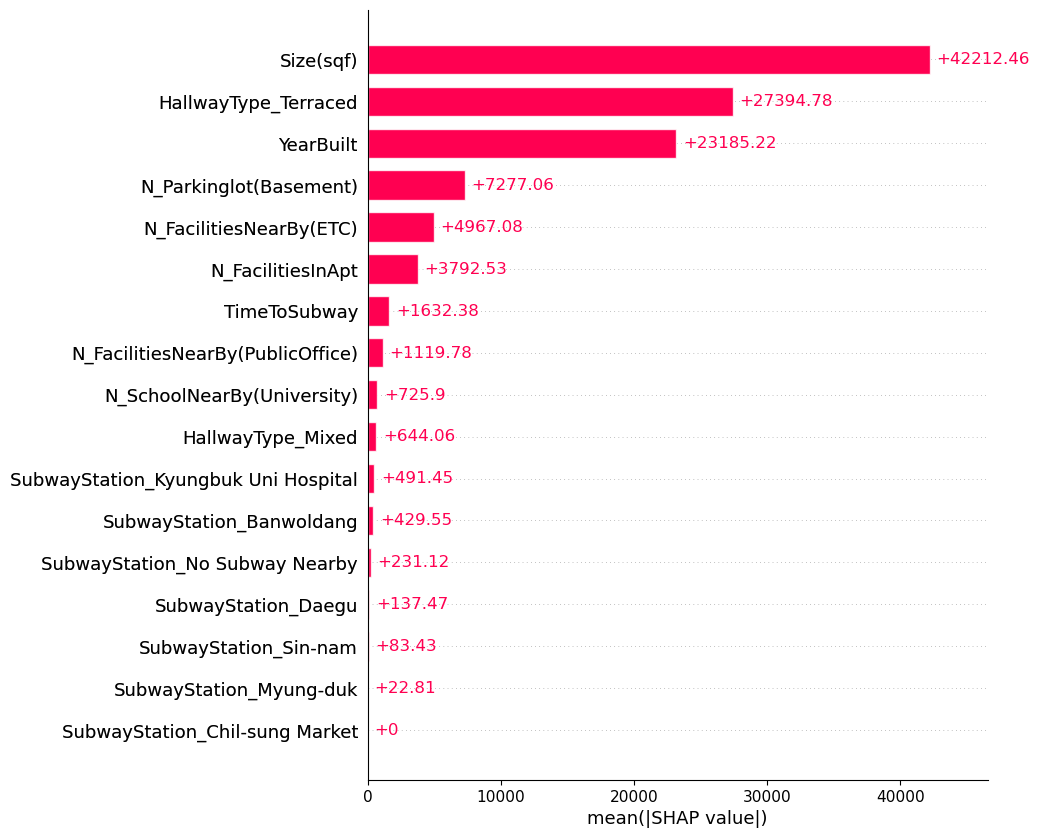

In [119]:
# Create SHAP explainer for Gradient Boosting:
explainer = shap.Explainer(final_model, X_test_selected)

# Calculate SHAP values:
shap_values = explainer(X_test_selected)

# Summary bar plot:
shap.plots.bar(
    shap_values,
    max_display=20
)

**Analysis:** While the Gradient Boosting model ranked HallwayType_Terraced highest in its internal structure, SHAP analysis — which better reflects actual prediction impact — shows Size(sqf) contributes most to price predictions, followed by YearBuilt and HallwayType_Terraced. This suggests size consistently drives apartment value, while age and layout of the building add contextual variance.

Other impactful features include the N_Parkinglot(Basement), N_FacilitiesInApt, and N_FacilitiesNearBy(ETC) (like shops or services)—all of which add to a property's attractiveness and value. Less influential, but still relevant, are features like TimeToSubway, N_FacilitiesNearby(PublicOffice), N_FacilitiesNearby(University).

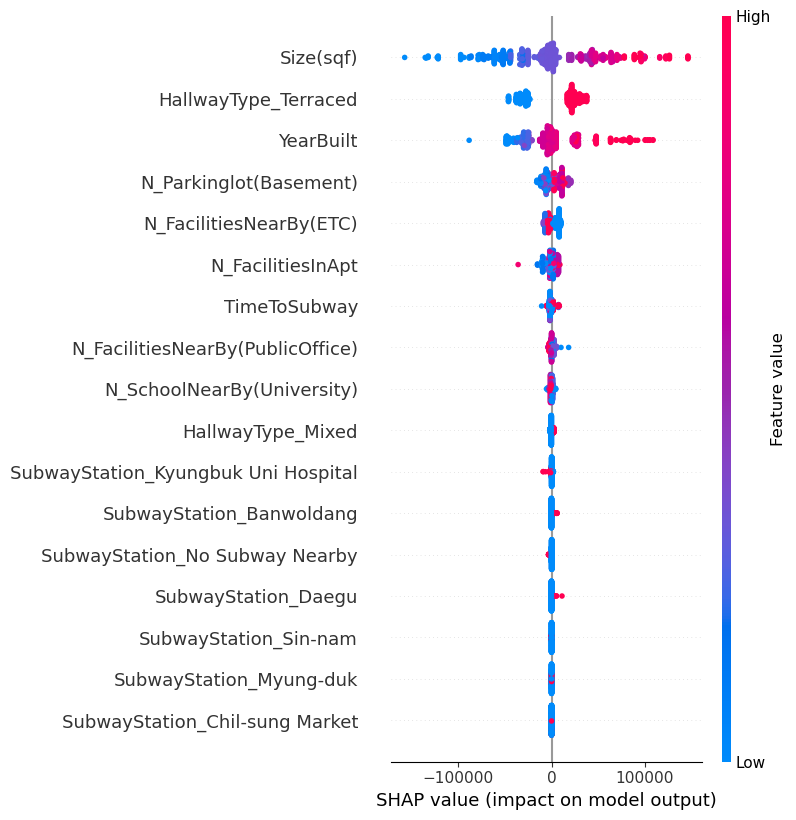

In [120]:
# Impact on model output:
shap.summary_plot(shap_values, X_test_selected)

**Analysis:** The SHAP summary plot gives us a clear picture of which features are driving our model’s predictions for apartment sale prices in Daegu.
- Top Drivers: Unsurprisingly, Size(sqf) and YearBuilt are the most influential features. Larger and newer apartments tend to push predictions higher, as seen by the red points on the right. Smaller or older ones (blue dots) tend to lower the predicted price.
- HallwayType_Terraced shows a mostly negative impact on sale prices, while HallwayType_Mixed seems more neutral, suggesting layout may play a role but not a dominant one.
- Basement parking (N_Parkinglot) and facilities in the apartment (N_FacilitiesInApt) positively influence price when present in higher numbers, although the effect is moderate.
- Interestingly, proximity to subway stations (like Kyungbuk Uni Hospital, Daegu, Myung-duk) doesn't have as strong an impact as expected. However, “No Subway Nearby” clearly has a negative effect — reinforcing that being near public transport is still better than not at all.
- Nearby amenities like public offices and universities show some positive influence, but their effect seems smaller compared to core physical apartment features.

Bottom line: Physical characteristics of the apartment — especially size and age — matter the most. Functional features like parking and internal facilities come next, while subway and surrounding infrastructure have a more subtle but still meaningful impact.


SHAP values at index 25:


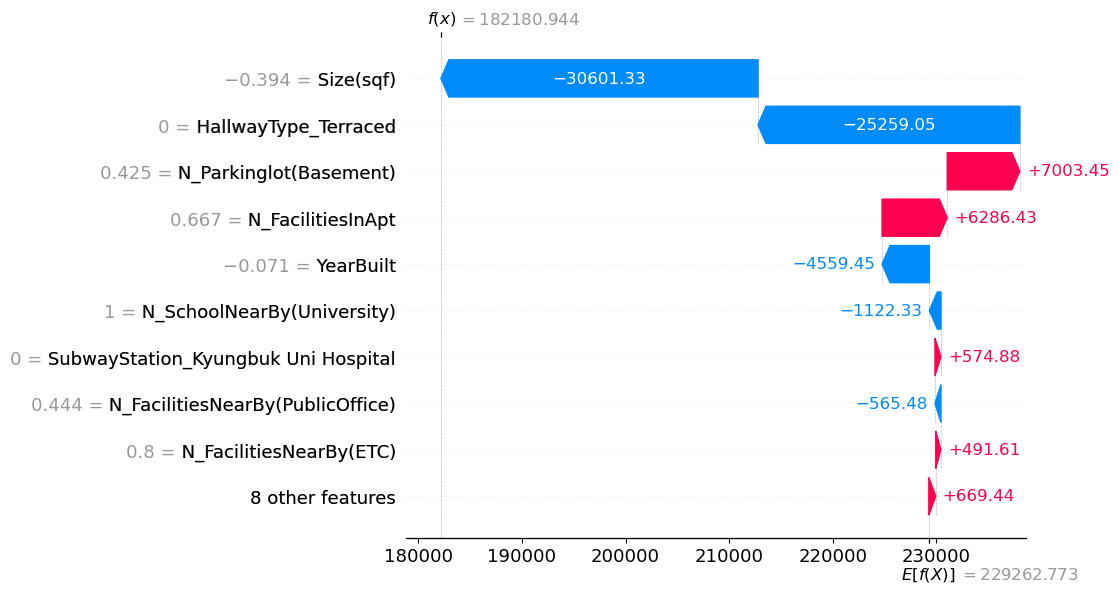


SHAP values at index 35:


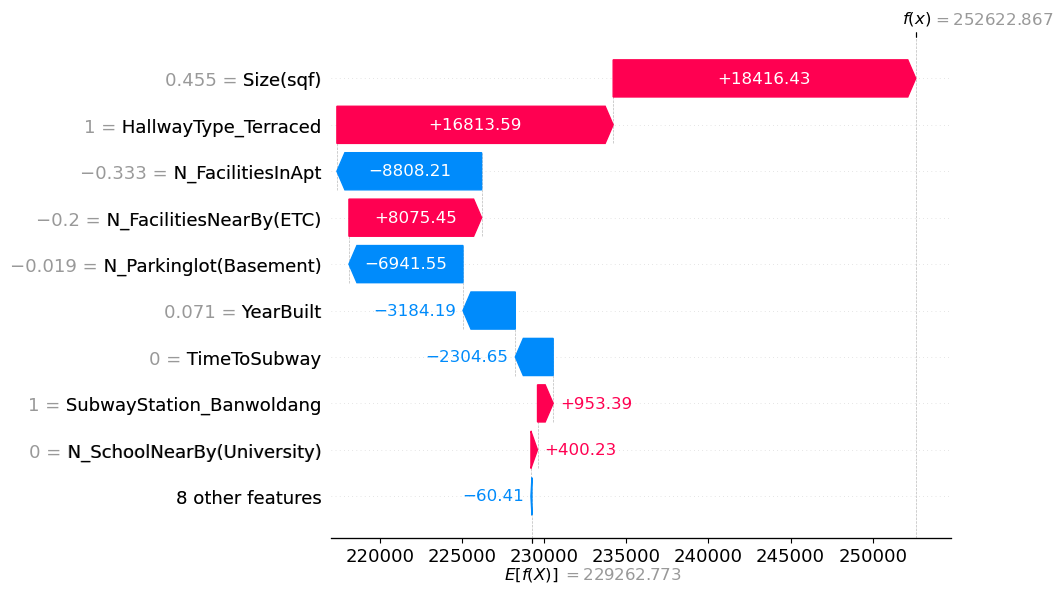

In [121]:
# Two similar samples by index:
idx_1 = 25
idx_2 = 35

# Waterfall plots for both:
print("\nSHAP values at index 25:")
shap.plots.waterfall(shap_values[idx_1])
print("\nSHAP values at index 35:")
shap.plots.waterfall(shap_values[idx_2])

**Analysis Index 25:** Predicted Price: ₩182,181 | Base Value (Average Prediction): ₩229,263 | Model Explanation: −₩47,082 total contribution from features.
- Top 3 Positive Contributors (Features pushing the price up):
    - N_Parkinglot(Basement) = +₩7,003 (Having more basement parking appears to be a premium amenity for this unit, possibly due to convenience or limited availability in the area.)
    - N_FacilitiesInApt = +₩6,286 (More facilities within the apartment itself likely enhance livability and modern appeal, making it more desirable.)
    - N_FacilitiesNearBy(ETC) = +₩669 (Slight boost here—could imply that the presence of miscellaneous nearby facilities contributes modestly to the perceived value.)
- Top 3 Negative Contributors (Features pulling the price down):
    - Size(sqf) = −₩30,601 (The single biggest drag—this apartment is notably smaller than average, heavily reducing its price potential.)
    - HallwayType_Terraced = −₩25,259 (Contrary to expectations in other cases, Terraced hallway type seems to hurt value here—possibly due to building quality or location context.)
    - YearBuilt = −₩4,559 (A slightly older construction date doesn’t help the price much—age might correlate with outdated features or design.)

Summary Insight:
This apartment’s value is significantly below average, driven mostly by its smaller size and less desirable hallway type. However, features like basement parking and in-unit facilities help cushion the fall a bit. This unit might appeal more to budget-conscious buyers who still want decent amenities.

**Analysis Index 35:** Predicted Price: ₩252,623 | Base Value (Average Prediction): ₩229,263 | Model Explanation: +₩23,360 total contribution from features.
- Top 3 Positive Contributors (Features pushing the price up):
    - Size(sqf) = +₩18,416.43 (As expected, a larger apartment size significantly increases the predicted price. This feature is consistently a strong positive driver across samples.)
    - HallwayType_Terraced = +₩16,813.59 (Terraced hallway design continues to stand out as a premium feature—likely tied to layout efficiency or perception of modernity.)
    - N_FacilitiesNearBy(ETC) = +₩8,075.45 (In contrast to some cases, the presence of nearby miscellaneous facilities here adds value—perhaps reflecting desirable community services or convenience.)
- Top 3 Negative Contributors (Features pulling the price down):
    - N_FacilitiesInApt = −₩8,808.21 (Fewer internal facilities in the apartment reduce its appeal and perceived quality, pulling the price downward.)
    - N_Parkinglot(Basement) = −₩6,941.55 (This might suggest either limited parking utility or oversupply in the area, decreasing its marginal value.)
    - YearBuilt = −₩3,184.19 (Moderate negative impact from age; not the oldest, but likely lacking features of newer developments.)

Summary Insight: This apartment commands a slightly above-average predicted price, mainly driven by its spacious size and favourable hallway design. Nearby amenities also contribute positively. However, the price is held back by fewer in-unit facilities and possible drawbacks associated with parking and age. Overall, this unit is priced well due to its strong layout and size—making it attractive despite some minor feature trade-offs.

## Conclusions:

After training and tuning multiple models to predict apartment sale prices in Daegu, **Gradient Boosting** and **CatBoost** emerged as top performers, offering a good balance between error metrics and interpretability. On unseen test data, **Gradient Boosting** delivered the **lowest MAE (~₩38.7k)** and **highest R² (~0.79)**, indicating that it captures the price trends reasonably well.

According to SHAP analysis, the most influential factor in predicting price is **Size(sqf)**—larger apartments predictably demand higher prices. **YearBuilt** and **HallwayType_Terraced** follow, with newer and more modern apartment layouts typically adding value. Other features like **N_Parkinglot(Basement)** and **N_FacilitiesInApt** also drive prices up, especially when present in higher counts. Meanwhile, subway accessibility and nearby public amenities (e.g., universities or public offices) offer some value, but not as much as the core physical and functional features of the property.

From the residual and prediction analysis, we see that the model performs consistently across most price ranges but struggles slightly more with high-priced listings—showing wider error margins. Despite this, the model doesn’t show systematic bias and maintains a strong upward trend in predicting higher values as actual prices rise, which is encouraging.

## Actionable Recommendations:

1. **Apply the model cautiously to high-end listings** 
    Prediction variance increases for pricier properties (₩250k+), so use model estimates as a starting point, but complement them with human appraisal or additional high-resolution features (e.g., luxury interior finishes, penthouse floors) for better accuracy.

2. **Prioritise data collection on internal features**  
    Features like `N_FacilitiesInApt` and `N_Parkinglot(Basement)` significantly impact pricing. For future data collection or listing optimisations, ensure these features are detailed and standardised across properties.

3. **Highlight premium traits in marketing**  
    Apartments with favourable traits like larger sizes, newer construction years, and terraced hallway types should have these aspects front and center in listings. These features have the most substantial upward influence on price.

4. **Use model explanations for buyer/seller transparency**  
    SHAP-based explanations (like those at Index 25 and 35) help clarify why certain apartments are priced higher or lower. Integrating these into customer reports can build trust and offer tangible selling points backed by data.

5. **Explore adding neighbourhood-level features**  
    To reduce residual variance and further tighten prediction accuracy, consider incorporating external data such as crime rates, school rankings, or nearby development projects. These can help explain some of the remaining variance in higher-end or outlier predictions.

In [122]:
# Save model (pickle):
estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor())
])

estimator.fit(X_train, y_train)

# Save entire pipeline in one file:
pickle.dump(estimator, open('gb_daegu_apartments_pipeline.sav', 'wb'))

# Load it back:
loaded_estimator = pickle.load(open('gb_daegu_apartments_pipeline.sav', 'rb'))

In [123]:
# Save model (joblib):
X_train_processed = preprocessor.fit_transform(X_train)
model = GradientBoostingRegressor()
model.fit(X_train_processed, y_train)

# Save preprocessor and model as separate files:
joblib.dump(preprocessor, 'preprocessor_daegu_apartments.pkl')
joblib.dump(model, 'model_daegu_apartments.pkl')

# Load separately:
preprocessor_loaded = joblib.load('preprocessor_daegu_apartments.pkl')
model_loaded = joblib.load('model_daegu_apartments.pkl')